### 非監督式學習 (Un-supervised learning)
訓練資料沒有標準答案，不需要事先以人力輸入標籤，故機器在學習時並不知道其分類結果是否正確。訓練時僅須對機器提供輸入資料(特徵)，並利用分群演算法自動從這些特徵中找出潛在的規則。

### 分群(Clustering)
1. 分群將資料集分成群集的方式。最常見的分群演算法為K-means。
2. 透過分群分類演算法我們能夠將多種維度的資料進行分類。

### k-means
k-means演算法僅一般加減乘除
1. 初始化 : 指定K個分群，並隨機挑選K個資料點的直當作群組中心點
2. 分配資料點 : 將每個資料點設為距離最近的中心
3. 計算平均值 : 重新計算每個分群的中心點
重複步驟2,3 直到資料點不再變換群組為止

In [1]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

In [2]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [5]:
X = df_train.drop(labels=["variety","Class"],axis=1).values #移除 class,variety(因為字母不參與訓練)
#checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


### K-Means
Parameters:
1. n_cluster : K的大小，也就是分群的類別數量
2. random_state : 亂數種子，設定常數能夠保證每次分群結果都一樣
3. n_init : 預設為10次隨機初始化，選擇效果最好的一種來做為模型
4. max_iter : 迭代次數，預設為300代

Attributes:
1. inertia_inertia_ : float，每個點到其他叢集的質心的距離之和
2. cluster_center_ : 特徵的中心點 [n_clusters , n_features]

Methods:
1. fit : K個集群分類模型訓練
2. predict : 預測並回傳類別
3. fit_predict : 先呼叫fit()做集群分類，之後再呼叫predict() 預測最終類別並回傳輸出
4. transform : 回傳的陣列每一行是每一個樣本到kmeans中各個中心點的L2(歐幾里得)距離
5. fit_transform : 先呼叫fit()再執行transform()



In [6]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3 , random_state=46)
clusters_pred = kmeansModel.fit_predict(X)

inertia : within cluster sum of squres,各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [7]:
kmeansModel.inertia_

78.851441426146

查看各cluster的中心，並在圖上畫出

In [8]:
kmeansModel.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### 真實分類

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


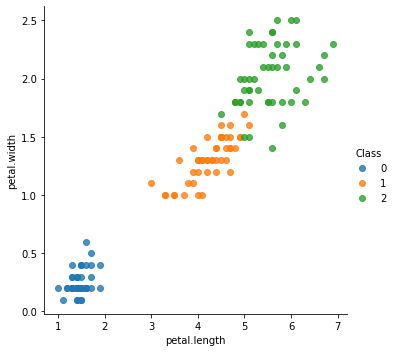

In [10]:
sns.lmplot("petal.length","petal.width",hue="Class",data=df_train , fit_reg=False)

### K-mean 後預測結果

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


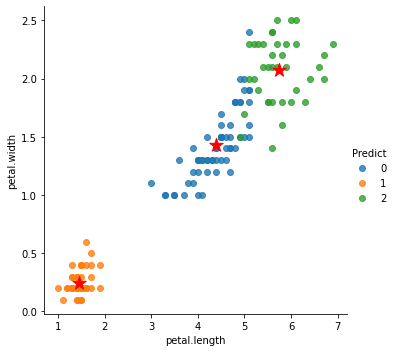

In [11]:
df_train["Predict"] = clusters_pred
sns.lmplot("petal.length","petal.width",data=df_train,hue="Predict",fit_reg=False)
plt.scatter(kmeansModel.cluster_centers_[:,2],kmeansModel.cluster_centers_[:,3],s=200,c="r",marker="*")
plt.show()

### 使用inertia做評估

In [12]:
# k=1~9 做九次kmeans,並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k,random_state=46).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_list]

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


如圖，當K值越大，inertia會隨之越來越小，(但k=n時理論上inertia會減為0，因此實際上不能選inetia最小的那個k)一般是取elbow point,即 inertia迅速下降轉為平緩的那個點

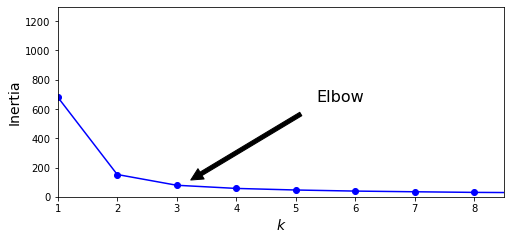

In [13]:
plt.figure(figsize=(8,3.5))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("$k$",fontsize = 14)
plt.ylabel("Inertia",fontsize = 14)
plt.annotate("Elbow",xy=(3,inertias[3]),xytext=(0.55,0.55),textcoords = "figure fraction",
fontsize = 16,arrowprops= dict(facecolor = "black",shrink = 0.1))
plt.axis([1,8.5,0,1300])
plt.show()